In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve

<h1>4. Machine Learning Models </h1>

<h2> 4.1 Reading data from file and storing into sql table </h2>

In [5]:
#Creating db file from csv
if not os.path.isfile('train.db'):
    disk_engine = create_engine('sqlite:///train.db')
    start = dt.datetime.now()
    chunksize = 180000
    j = 0
    index_start = 1
    for df in pd.read_csv('final_features.csv', names=['Unnamed: 0','id','is_duplicate','cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','last_word_eq','first_word_eq','abs_len_diff','mean_len','token_set_ratio','token_sort_ratio','fuzz_ratio','fuzz_partial_ratio','longest_substr_ratio','freq_qid1','freq_qid2','q1len','q2len','q1_n_words','q2_n_words','word_Common','word_Total','word_share','freq_q1+q2','freq_q1-q2','0_x','1_x','2_x','3_x','4_x','5_x','6_x','7_x','8_x','9_x','10_x','11_x','12_x','13_x','14_x','15_x','16_x','17_x','18_x','19_x','20_x','21_x','22_x','23_x','24_x','25_x','26_x','27_x','28_x','29_x','30_x','31_x','32_x','33_x','34_x','35_x','36_x','37_x','38_x','39_x','40_x','41_x','42_x','43_x','44_x','45_x','46_x','47_x','48_x','49_x','50_x','51_x','52_x','53_x','54_x','55_x','56_x','57_x','58_x','59_x','60_x','61_x','62_x','63_x','64_x','65_x','66_x','67_x','68_x','69_x','70_x','71_x','72_x','73_x','74_x','75_x','76_x','77_x','78_x','79_x','80_x','81_x','82_x','83_x','84_x','85_x','86_x','87_x','88_x','89_x','90_x','91_x','92_x','93_x','94_x','95_x','96_x','97_x','98_x','99_x','100_x','101_x','102_x','103_x','104_x','105_x','106_x','107_x','108_x','109_x','110_x','111_x','112_x','113_x','114_x','115_x','116_x','117_x','118_x','119_x','120_x','121_x','122_x','123_x','124_x','125_x','126_x','127_x','128_x','129_x','130_x','131_x','132_x','133_x','134_x','135_x','136_x','137_x','138_x','139_x','140_x','141_x','142_x','143_x','144_x','145_x','146_x','147_x','148_x','149_x','150_x','151_x','152_x','153_x','154_x','155_x','156_x','157_x','158_x','159_x','160_x','161_x','162_x','163_x','164_x','165_x','166_x','167_x','168_x','169_x','170_x','171_x','172_x','173_x','174_x','175_x','176_x','177_x','178_x','179_x','180_x','181_x','182_x','183_x','184_x','185_x','186_x','187_x','188_x','189_x','190_x','191_x','192_x','193_x','194_x','195_x','196_x','197_x','198_x','199_x','200_x','201_x','202_x','203_x','204_x','205_x','206_x','207_x','208_x','209_x','210_x','211_x','212_x','213_x','214_x','215_x','216_x','217_x','218_x','219_x','220_x','221_x','222_x','223_x','224_x','225_x','226_x','227_x','228_x','229_x','230_x','231_x','232_x','233_x','234_x','235_x','236_x','237_x','238_x','239_x','240_x','241_x','242_x','243_x','244_x','245_x','246_x','247_x','248_x','249_x','250_x','251_x','252_x','253_x','254_x','255_x','256_x','257_x','258_x','259_x','260_x','261_x','262_x','263_x','264_x','265_x','266_x','267_x','268_x','269_x','270_x','271_x','272_x','273_x','274_x','275_x','276_x','277_x','278_x','279_x','280_x','281_x','282_x','283_x','284_x','285_x','286_x','287_x','288_x','289_x','290_x','291_x','292_x','293_x','294_x','295_x','296_x','297_x','298_x','299_x','300_x','301_x','302_x','303_x','304_x','305_x','306_x','307_x','308_x','309_x','310_x','311_x','312_x','313_x','314_x','315_x','316_x','317_x','318_x','319_x','320_x','321_x','322_x','323_x','324_x','325_x','326_x','327_x','328_x','329_x','330_x','331_x','332_x','333_x','334_x','335_x','336_x','337_x','338_x','339_x','340_x','341_x','342_x','343_x','344_x','345_x','346_x','347_x','348_x','349_x','350_x','351_x','352_x','353_x','354_x','355_x','356_x','357_x','358_x','359_x','360_x','361_x','362_x','363_x','364_x','365_x','366_x','367_x','368_x','369_x','370_x','371_x','372_x','373_x','374_x','375_x','376_x','377_x','378_x','379_x','380_x','381_x','382_x','383_x','0_y','1_y','2_y','3_y','4_y','5_y','6_y','7_y','8_y','9_y','10_y','11_y','12_y','13_y','14_y','15_y','16_y','17_y','18_y','19_y','20_y','21_y','22_y','23_y','24_y','25_y','26_y','27_y','28_y','29_y','30_y','31_y','32_y','33_y','34_y','35_y','36_y','37_y','38_y','39_y','40_y','41_y','42_y','43_y','44_y','45_y','46_y','47_y','48_y','49_y','50_y','51_y','52_y','53_y','54_y','55_y','56_y','57_y','58_y','59_y','60_y','61_y','62_y','63_y','64_y','65_y','66_y','67_y','68_y','69_y','70_y','71_y','72_y','73_y','74_y','75_y','76_y','77_y','78_y','79_y','80_y','81_y','82_y','83_y','84_y','85_y','86_y','87_y','88_y','89_y','90_y','91_y','92_y','93_y','94_y','95_y','96_y','97_y','98_y','99_y','100_y','101_y','102_y','103_y','104_y','105_y','106_y','107_y','108_y','109_y','110_y','111_y','112_y','113_y','114_y','115_y','116_y','117_y','118_y','119_y','120_y','121_y','122_y','123_y','124_y','125_y','126_y','127_y','128_y','129_y','130_y','131_y','132_y','133_y','134_y','135_y','136_y','137_y','138_y','139_y','140_y','141_y','142_y','143_y','144_y','145_y','146_y','147_y','148_y','149_y','150_y','151_y','152_y','153_y','154_y','155_y','156_y','157_y','158_y','159_y','160_y','161_y','162_y','163_y','164_y','165_y','166_y','167_y','168_y','169_y','170_y','171_y','172_y','173_y','174_y','175_y','176_y','177_y','178_y','179_y','180_y','181_y','182_y','183_y','184_y','185_y','186_y','187_y','188_y','189_y','190_y','191_y','192_y','193_y','194_y','195_y','196_y','197_y','198_y','199_y','200_y','201_y','202_y','203_y','204_y','205_y','206_y','207_y','208_y','209_y','210_y','211_y','212_y','213_y','214_y','215_y','216_y','217_y','218_y','219_y','220_y','221_y','222_y','223_y','224_y','225_y','226_y','227_y','228_y','229_y','230_y','231_y','232_y','233_y','234_y','235_y','236_y','237_y','238_y','239_y','240_y','241_y','242_y','243_y','244_y','245_y','246_y','247_y','248_y','249_y','250_y','251_y','252_y','253_y','254_y','255_y','256_y','257_y','258_y','259_y','260_y','261_y','262_y','263_y','264_y','265_y','266_y','267_y','268_y','269_y','270_y','271_y','272_y','273_y','274_y','275_y','276_y','277_y','278_y','279_y','280_y','281_y','282_y','283_y','284_y','285_y','286_y','287_y','288_y','289_y','290_y','291_y','292_y','293_y','294_y','295_y','296_y','297_y','298_y','299_y','300_y','301_y','302_y','303_y','304_y','305_y','306_y','307_y','308_y','309_y','310_y','311_y','312_y','313_y','314_y','315_y','316_y','317_y','318_y','319_y','320_y','321_y','322_y','323_y','324_y','325_y','326_y','327_y','328_y','329_y','330_y','331_y','332_y','333_y','334_y','335_y','336_y','337_y','338_y','339_y','340_y','341_y','342_y','343_y','344_y','345_y','346_y','347_y','348_y','349_y','350_y','351_y','352_y','353_y','354_y','355_y','356_y','357_y','358_y','359_y','360_y','361_y','362_y','363_y','364_y','365_y','366_y','367_y','368_y','369_y','370_y','371_y','372_y','373_y','374_y','375_y','376_y','377_y','378_y','379_y','380_y','381_y','382_y','383_y'], chunksize=chunksize, iterator=True, encoding='utf-8', ):
        df.index += index_start
        j+=1
        print('{} rows'.format(j*chunksize))
        df.to_sql('data', disk_engine, if_exists='append')
        index_start = df.index[-1] + 1

180000 rows
360000 rows
540000 rows


In [6]:
#http://www.sqlitetutorial.net/sqlite-python/create-tables/
def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None


def checkTableExists(dbcon):
    cursr = dbcon.cursor()
    str = "select name from sqlite_master where type='table'"
    table_names = cursr.execute(str)
    print("Tables in the databse:")
    tables =table_names.fetchall() 
    print(tables[0][0])
    return(len(tables))

In [7]:
read_db = 'train.db'
conn_r = create_connection(read_db)
checkTableExists(conn_r)
conn_r.close()

Tables in the databse:
data


In [8]:
# try to sample data according to the computing power you have
if os.path.isfile(read_db):
    conn_r = create_connection(read_db)
    if conn_r is not None:
        # for selecting first 1M rows
        # data = pd.read_sql_query("""SELECT * FROM data LIMIT 100001;""", conn_r)
        
        # for selecting random points
        data = pd.read_sql_query("SELECT * From data ORDER BY RANDOM() LIMIT 100001;", conn_r)
        conn_r.commit()
        conn_r.close()

In [9]:
# remove the first row 
data.drop(data.index[0], inplace=True)
y_true = data['is_duplicate']
data.drop(['Unnamed: 0', 'id','index','is_duplicate'], axis=1, inplace=True)

In [10]:
data.head()

,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,...,374_y,375_y,376_y,377_y,378_y,379_y,380_y,381_y,382_y,383_y
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,11.5,...,-4.74771944060922,0.63420669734478,16.7233105264604,1.3819899186492,13.8163641048595,15.7453515380621,-8.49181322660297,28.1099367644638,0.447417743504047,17.0210246257484
2,0.444439506227709,0.333330555578704,0.999980000399992,0.384612426058261,0.642852551053207,0.321427423473488,0.0,0.0,14.0,21.0,...,11.0398860356654,9.7732243873179,16.1559629067779,-9.26118110865354,-9.73342320136726,18.6102656126022,-12.5960157699883,17.8688477165997,8.75548571441323,-4.17363080894575
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,8.5,...,3.19591072201729,29.72090446949,13.0027243643999,-15.0062184929848,4.63148367404938,-8.01376211643219,-17.8192344009876,17.1392154097557,7.05006449110806,1.38924756646156
4,0.799984000319994,0.799984000319994,0.799984000319994,0.666655555740738,0.799992000079999,0.727266115762584,0.0,1.0,1.0,10.5,...,-3.01876199617982,14.879442512989,-14.6252060867846,-6.79130015225383,6.03784726653248,-2.3260660469532,-16.7126381990965,-6.99195481836796,-12.9593828618526,-2.25315896421671
5,0.0,0.0,0.66664444518516,0.333327777870369,0.142856122456268,0.13333244445037,0.0,1.0,1.0,14.5,...,-2.19530664384365,17.4684041552246,4.97793315351009,-0.946716070175171,14.9981598611921,-1.85854603722692,-18.8785025775433,13.4629443883896,7.4761313572526,6.23689205944538


<h2> 4.2 Converting strings to numerics </h2>

In [11]:
# after we read from sql table each entry was read it as a string
# we convert all the features into numaric before we apply any model
cols = list(data.columns)
for i in cols:
    data[i] = data[i].apply(pd.to_numeric)
    print(i)

cwc_min
cwc_max
csc_min
csc_max
ctc_min
ctc_max
last_word_eq
first_word_eq
abs_len_diff
mean_len
token_set_ratio
token_sort_ratio
fuzz_ratio
fuzz_partial_ratio
longest_substr_ratio
freq_qid1
freq_qid2
q1len
q2len
q1_n_words
q2_n_words
word_Common
word_Total
word_share
freq_q1+q2
freq_q1-q2
0_x
1_x
2_x
3_x
4_x
5_x
6_x
7_x
8_x
9_x
10_x
11_x
12_x
13_x
14_x
15_x
16_x
17_x
18_x
19_x
20_x
21_x
22_x
23_x
24_x
25_x
26_x
27_x
28_x
29_x
30_x
31_x
32_x
33_x
34_x
35_x
36_x
37_x
38_x
39_x
40_x
41_x
42_x
43_x
44_x
45_x
46_x
47_x
48_x
49_x
50_x
51_x
52_x
53_x
54_x
55_x
56_x
57_x
58_x
59_x
60_x
61_x
62_x
63_x
64_x
65_x
66_x
67_x
68_x
69_x
70_x
71_x
72_x
73_x
74_x
75_x
76_x
77_x
78_x
79_x
80_x
81_x
82_x
83_x
84_x
85_x
86_x
87_x
88_x
89_x
90_x
91_x
92_x
93_x
94_x
95_x
96_x
97_x
98_x
99_x
100_x
101_x
102_x
103_x
104_x
105_x
106_x
107_x
108_x
109_x
110_x
111_x
112_x
113_x
114_x
115_x
116_x
117_x
118_x
119_x
120_x
121_x
122_x
123_x
124_x
125_x
126_x
127_x
128_x
129_x
130_x
131_x
132_x
133_x
134_x
135_x
136

In [0]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true.values))

<h2> 4.3 Random train test split( 70:30) </h2>

In [12]:
X_train,X_test, y_train, y_test = train_test_split(data, y_true, stratify=y_true, test_size=0.3)

In [15]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 794)
Number of data points in test data : (30000, 794)


In [17]:
print(y_train.shape)
print(y_test.shape)

(70000,)
(30000,)


In [29]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr['0'])/train_len,"Class 1: ", int(train_distr['1'])/train_len)
print("-"*10, "Distribution of output variable in test data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr['1'])/test_len, "Class 1: ",int(test_distr['1'])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6306428571428572 Class 1:  0.3693571428571429
---------- Distribution of output variable in test data ----------
Class 0:  0.36933333333333335 Class 1:  0.36933333333333335


In [2]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

<h2> 4.4 Building a random model (Finding worst-case log-loss) </h2>

Log loss on Test Data using Random Model 0.8939451125217412


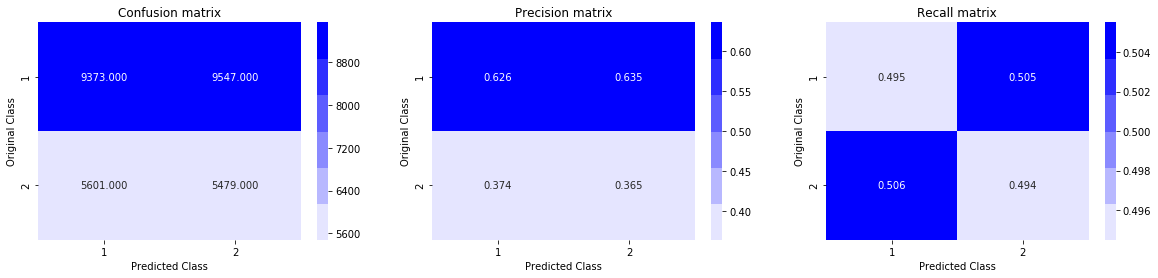

In [112]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))
predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.4 Logistic Regression with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.553916879962817
For values of alpha =  0.0001 The log loss is: 0.5270208292426586
For values of alpha =  0.001 The log loss is: 0.5142780604558892
For values of alpha =  0.01 The log loss is: 0.519823433187696
For values of alpha =  0.1 The log loss is: 0.5185030323881291
For values of alpha =  1 The log loss is: 0.5107604016480848
For values of alpha =  10 The log loss is: 0.517296530116165


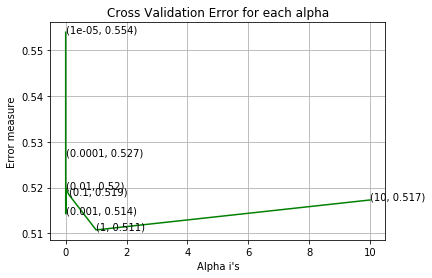

For values of best alpha =  1 The train log loss is: 0.505736582097431
For values of best alpha =  1 The test log loss is: 0.5107604016480848
Total number of data points : 30000


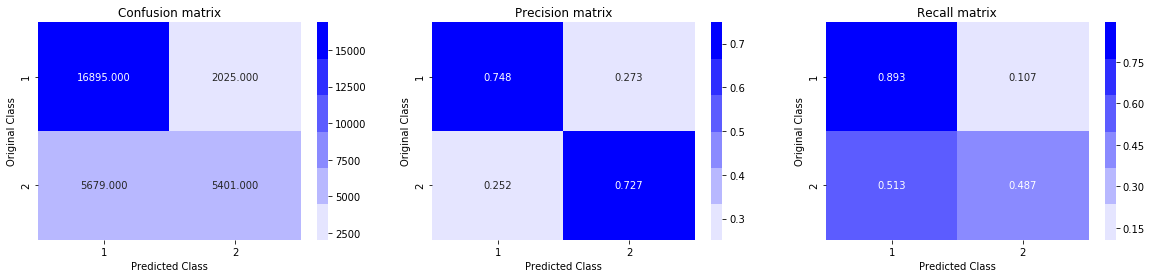

In [113]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.5 Linear SVM with hyperparameter tuning </h2>

For values of alpha =  1e-05 The log loss is: 0.5788774789903178
For values of alpha =  0.0001 The log loss is: 0.4908580033228307
For values of alpha =  0.001 The log loss is: 0.5213664721461834
For values of alpha =  0.01 The log loss is: 0.5571816816845218
For values of alpha =  0.1 The log loss is: 0.5883634494015635
For values of alpha =  1 The log loss is: 0.6090331617293725
For values of alpha =  10 The log loss is: 0.6282824182183036


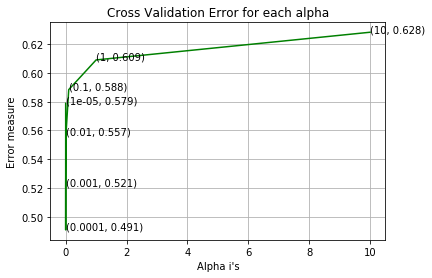

For values of best alpha =  0.0001 The train log loss is: 0.48201727349939166
For values of best alpha =  0.0001 The test log loss is: 0.4908580033228307
Total number of data points : 30000


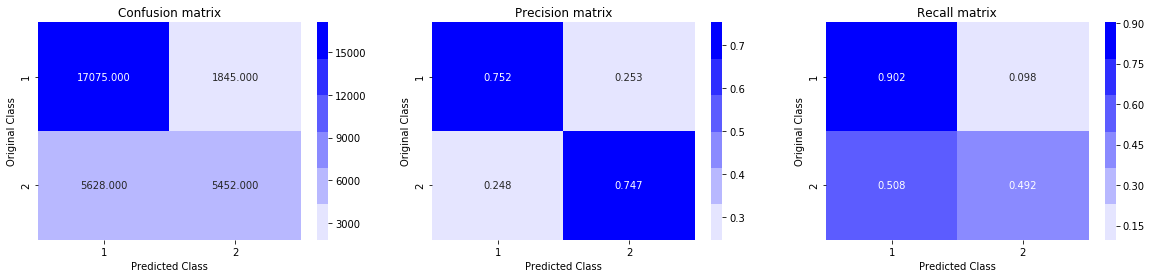

In [114]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42)
    clf.fit(X_train, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train, y_train)
    predict_y = sig_clf.predict_proba(X_test)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42)
clf.fit(X_train, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train, y_train)

predict_y = sig_clf.predict_proba(X_train)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h2> 4.6 XGBoost </h2>

In [119]:
import xgboost as xgb
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4

a = [int(x) for x in y_train.values]
train_dup = np.array(a)

b = [int(x) for x in y_test.values]
test_dup = np.array(b)

d_train = xgb.DMatrix(X_train, label=train_dup)
d_test = xgb.DMatrix(X_test, label=test_dup)

watchlist = [(d_train, 'train'), (d_test, 'valid')]

bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)

xgdmat = xgb.DMatrix(X_train,train_dup)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.684907	valid-logloss:0.684934
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.616249	valid-logloss:0.61626
[20]	train-logloss:0.56586	valid-logloss:0.566067
[30]	train-logloss:0.528146	valid-logloss:0.528586
[40]	train-logloss:0.498831	valid-logloss:0.499504
[50]	train-logloss:0.475844	valid-logloss:0.476739
[60]	train-logloss:0.457201	valid-logloss:0.458375
[70]	train-logloss:0.442229	valid-logloss:0.443649
[80]	train-logloss:0.430224	valid-logloss:0.431898
[90]	train-logloss:0.420647	valid-logloss:0.422527
[100]	train-logloss:0.412566	valid-logloss:0.414638
[110]	train-logloss:0.405799	valid-logloss:0.408043
[120]	train-logloss:0.399885	valid-logloss:0.402354
[130]	train-logloss:0.395166	valid-logloss:0.39785
[140]	train-logloss:0.391105	valid-logloss:0.394
[150]	train-logloss:0.387341	valid-logloss:0.390509
[160]	train-logloss:0.384229	valid

Total number of data points : 30000


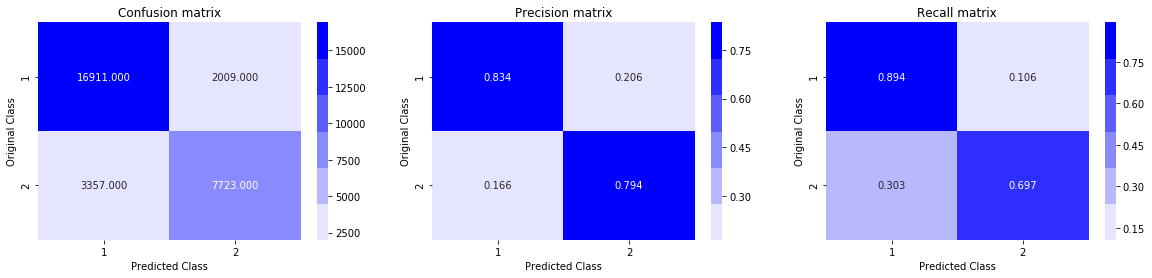

In [120]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

<h1> 5. Assignments </h1>

1. Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
2. Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


## Logistic regression, Linear-SVM with simple TF-IDF vectors

In [3]:
# avoid decoding problems
df = pd.read_csv("train.csv")
 
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
df['question1'] = df['question1'].apply(lambda x: str(x))
df['question2'] = df['question2'].apply(lambda x: str(x))

In [4]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
#prepro_features_train.csv (Simple Preprocessing Feartures)
#nlp_features_train.csv (NLP Features)
if os.path.isfile('nlp_features_train.csv'):
    dfnlp = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
else:
    print("download nlp_features_train.csv from drive or run previous notebook")

if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    dfppro = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    print("download df_fe_without_preprocessing_train.csv from drive or run previous notebook")

In [6]:
# NLP features
df1 = dfnlp.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
# Preprocessing features
df2 = dfppro.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)
print(df1.shape)
print(df2.shape)

(404290, 16)
(404290, 12)


In [7]:
df3 = pd.merge(df1, df2, how='inner', on = 'id')
df3.head()

,id,cwc_min,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,0.999980,0.833319,0.999983,0.999983,0.916659,0.785709,0.0,1.0,2.0,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,0.799984,0.399996,0.749981,0.599988,0.699993,0.466664,0.0,1.0,5.0,...,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,0.399992,0.333328,0.399992,0.249997,0.399996,0.285712,0.0,1.0,4.0,...,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,2.0,...,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,0.399992,0.199998,0.999950,0.666644,0.571420,0.307690,0.0,1.0,6.0,...,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [8]:
df_final = pd.merge(df, df3, how='inner', on = 'id')
df_final.head()

,id,qid1,qid2,question1,question2,is_duplicate,cwc_min,cwc_max,csc_min,csc_max,...,freq_qid2,q1len,q2len,q1_n_words,q2_n_words,word_Common,word_Total,word_share,freq_q1+q2,freq_q1-q2
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,0.999980,0.833319,0.999983,0.999983,...,1,66,57,14,12,10.0,23.0,0.434783,2,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,0.799984,0.399996,0.749981,0.599988,...,1,51,88,8,13,4.0,20.0,0.200000,5,3
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,0.399992,0.333328,0.399992,0.249997,...,1,73,59,14,10,4.0,24.0,0.166667,2,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,0.000000,0.000000,0.000000,0.000000,...,1,50,65,11,9,0.0,19.0,0.000000,2,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,0.399992,0.199998,0.999950,0.666644,...,1,76,39,13,7,2.0,20.0,0.100000,4,2


In [9]:
from sklearn.model_selection import train_test_split
Quora_train, Quora_test, isDuplicate_train, isDuplicate_test = train_test_split(df_final, df_final['is_duplicate'], test_size=0.33, stratify=df_final['is_duplicate'])
Quora_train, Quora_cv, isDuplicate_train, isDuplicate_cv = train_test_split(Quora_train, isDuplicate_train, test_size=0.33, stratify=isDuplicate_train)

In [10]:
print(Quora_train.shape,isDuplicate_train.shape)
print(Quora_test.shape,isDuplicate_test.shape)
print(Quora_cv.shape,isDuplicate_cv.shape)
df_final.columns

(181485, 32) (181485,)
(133416, 32) (133416,)
(89389, 32) (89389,)


Index(['id', 'qid1', 'qid2', 'question1', 'question2', 'is_duplicate',
       'cwc_min', 'cwc_max', 'csc_min', 'csc_max', 'ctc_min', 'ctc_max',
       'last_word_eq', 'first_word_eq', 'abs_len_diff', 'mean_len',
       'token_set_ratio', 'token_sort_ratio', 'fuzz_ratio',
       'fuzz_partial_ratio', 'longest_substr_ratio', 'freq_qid1', 'freq_qid2',
       'q1len', 'q2len', 'q1_n_words', 'q2_n_words', 'word_Common',
       'word_Total', 'word_share', 'freq_q1+q2', 'freq_q1-q2'],
      dtype='object')

## TFIDF vectorization

In [11]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_Q1_TDIDF = TfidfVectorizer()
vectorizer_Q1_TDIDF.fit(Quora_train['question1'].values) # fit has to happen only on train data

Quora_train_tfidf = vectorizer_Q1_TDIDF.transform(Quora_train['question1'].values)
Quora_cv_tfidf = vectorizer_Q1_TDIDF.transform(Quora_cv['question1'].values)
Quora_test_tfidf = vectorizer_Q1_TDIDF.transform(Quora_test['question1'].values)

print("After vectorizing Quora Question 1 to TFIDF")
print(Quora_train_tfidf.shape, isDuplicate_train.shape)
print(Quora_cv_tfidf.shape, isDuplicate_cv.shape)
print(Quora_test_tfidf.shape, isDuplicate_test.shape)
print("="*100)

After vectorizing Quora Question 1 to TFIDF
(181485, 47987) (181485,)
(89389, 47987) (89389,)
(133416, 47987) (133416,)
Wall time: 6.06 s


In [12]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_Q2_TDIDF = TfidfVectorizer()
vectorizer_Q2_TDIDF.fit(Quora_train['question2'].values) # fit has to happen only on train data

Quora_train_tfidf_Q2 = vectorizer_Q2_TDIDF.transform(Quora_train['question2'].values)
Quora_cv_tfidf_Q2 = vectorizer_Q2_TDIDF.transform(Quora_cv['question2'].values)
Quora_test_tfidf_Q2 = vectorizer_Q2_TDIDF.transform(Quora_test['question2'].values)

print("After vectorizing Quora Question 2 to TFIDF")
print(Quora_train_tfidf_Q2.shape, isDuplicate_train.shape)
print(Quora_cv_tfidf_Q2.shape, isDuplicate_cv.shape)
print(Quora_test_tfidf_Q2.shape, isDuplicate_test.shape)
print("="*100)

After vectorizing Quora Question 2 to TFIDF
(181485, 44233) (181485,)
(89389, 44233) (89389,)
(133416, 44233) (133416,)
Wall time: 5.99 s


## Numerical features

In [13]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
normalizer.fit(Quora_train['cwc_min'].values.reshape(-1,1))
Quora_train_cwc_min = normalizer.transform(Quora_train['cwc_min'].values.reshape(-1,1))
Quora_cv_cwc_min = normalizer.transform(Quora_cv['cwc_min'].values.reshape(-1,1))
Quora_test_cwc_min  = normalizer.transform(Quora_test['cwc_min'].values.reshape(-1,1))

In [14]:
normalizer.fit(Quora_train['cwc_max'].values.reshape(-1,1))
Quora_train_cwc_max = normalizer.transform(Quora_train['cwc_max'].values.reshape(-1,1))
Quora_cv_cwc_max = normalizer.transform(Quora_cv['cwc_max'].values.reshape(-1,1))
Quora_test_cwc_max = normalizer.transform(Quora_test['cwc_max'].values.reshape(-1,1))

In [15]:
normalizer.fit(Quora_train['csc_min'].values.reshape(-1,1))
Quora_train_csc_min = normalizer.transform(Quora_train['csc_min'].values.reshape(-1,1))
Quora_cv_csc_min = normalizer.transform(Quora_cv['csc_min'].values.reshape(-1,1))
Quora_test_csc_min  = normalizer.transform(Quora_test['csc_min'].values.reshape(-1,1))

In [16]:
normalizer.fit(Quora_train['csc_max'].values.reshape(-1,1))
Quora_train_csc_max = normalizer.transform(Quora_train['csc_max'].values.reshape(-1,1))
Quora_cv_csc_max = normalizer.transform(Quora_cv['csc_max'].values.reshape(-1,1))
Quora_test_csc_max  = normalizer.transform(Quora_test['csc_max'].values.reshape(-1,1))

In [17]:
normalizer.fit(Quora_train['ctc_min'].values.reshape(-1,1))
Quora_train_ctc_min = normalizer.transform(Quora_train['ctc_min'].values.reshape(-1,1))
Quora_cv_ctc_min = normalizer.transform(Quora_cv['ctc_min'].values.reshape(-1,1))
Quora_test_ctc_min  = normalizer.transform(Quora_test['ctc_min'].values.reshape(-1,1))

In [18]:
normalizer.fit(Quora_train['ctc_max'].values.reshape(-1,1))
Quora_train_ctc_max = normalizer.transform(Quora_train['ctc_max'].values.reshape(-1,1))
Quora_cv_ctc_max = normalizer.transform(Quora_cv['ctc_max'].values.reshape(-1,1))
Quora_test_ctc_max = normalizer.transform(Quora_test['ctc_max'].values.reshape(-1,1))

In [19]:
normalizer.fit(Quora_train['token_set_ratio'].values.reshape(-1,1))
Quora_train_tsr = normalizer.transform(Quora_train['token_set_ratio'].values.reshape(-1,1))
Quora_cv_tsr = normalizer.transform(Quora_cv['token_set_ratio'].values.reshape(-1,1))
Quora_test_tsr = normalizer.transform(Quora_test['token_set_ratio'].values.reshape(-1,1))

In [20]:
normalizer.fit(Quora_train['token_sort_ratio'].values.reshape(-1,1))
Quora_train_tstr = normalizer.transform(Quora_train['token_sort_ratio'].values.reshape(-1,1))
Quora_cv_tstr = normalizer.transform(Quora_cv['token_sort_ratio'].values.reshape(-1,1))
Quora_test_tstr= normalizer.transform(Quora_test['token_sort_ratio'].values.reshape(-1,1))

In [21]:
normalizer.fit(Quora_train['fuzz_ratio'].values.reshape(-1,1))
Quora_train_fr = normalizer.transform(Quora_train['fuzz_ratio'].values.reshape(-1,1))
Quora_cv_fr = normalizer.transform(Quora_cv['fuzz_ratio'].values.reshape(-1,1))
Quora_test_fr= normalizer.transform(Quora_test['fuzz_ratio'].values.reshape(-1,1))

In [22]:
normalizer.fit(Quora_train['fuzz_partial_ratio'].values.reshape(-1,1))
Quora_train_fpr = normalizer.transform(Quora_train['fuzz_partial_ratio'].values.reshape(-1,1))
Quora_cv_fpr = normalizer.transform(Quora_cv['fuzz_partial_ratio'].values.reshape(-1,1))
Quora_test_fpr= normalizer.transform(Quora_test['fuzz_partial_ratio'].values.reshape(-1,1))

In [23]:
normalizer.fit(Quora_train['word_Common'].values.reshape(-1,1))
Quora_train_wc = normalizer.transform(Quora_train['word_Common'].values.reshape(-1,1))
Quora_cv_wc = normalizer.transform(Quora_cv['word_Common'].values.reshape(-1,1))
Quora_test_wc= normalizer.transform(Quora_test['word_Common'].values.reshape(-1,1))

In [24]:
normalizer.fit(Quora_train['word_share'].values.reshape(-1,1))
Quora_train_ws = normalizer.transform(Quora_train['word_share'].values.reshape(-1,1))
Quora_cv_ws = normalizer.transform(Quora_cv['word_share'].values.reshape(-1,1))
Quora_test_ws = normalizer.transform(Quora_test['word_share'].values.reshape(-1,1))

In [25]:
normalizer.fit(Quora_train['longest_substr_ratio'].values.reshape(-1,1))
Quora_train_lsr = normalizer.transform(Quora_train['longest_substr_ratio'].values.reshape(-1,1))
Quora_cv_lsr = normalizer.transform(Quora_cv['longest_substr_ratio'].values.reshape(-1,1))
Quora_test_lsr = normalizer.transform(Quora_test['longest_substr_ratio'].values.reshape(-1,1))

In [26]:
normalizer.fit(Quora_train['word_Total'].values.reshape(-1,1))
Quora_train_wt = normalizer.transform(Quora_train['word_Total'].values.reshape(-1,1))
Quora_cv_wt = normalizer.transform(Quora_cv['word_Total'].values.reshape(-1,1))
Quora_test_wt = normalizer.transform(Quora_test['word_Total'].values.reshape(-1,1))

In [27]:
normalizer.fit(Quora_train['freq_q1+q2'].values.reshape(-1,1))
Quora_train_fq1q2 = normalizer.transform(Quora_train['freq_q1+q2'].values.reshape(-1,1))
Quora_cv_fq1q2 = normalizer.transform(Quora_cv['freq_q1+q2'].values.reshape(-1,1))
Quora_test_fq1q2 = normalizer.transform(Quora_test['freq_q1+q2'].values.reshape(-1,1))

In [28]:
normalizer.fit(Quora_train['freq_q1-q2'].values.reshape(-1,1))
Quora_train_fq1_q2 = normalizer.transform(Quora_train['freq_q1-q2'].values.reshape(-1,1))
Quora_cv_fq1_q2 = normalizer.transform(Quora_cv['freq_q1-q2'].values.reshape(-1,1))
Quora_test_fq1_q2 = normalizer.transform(Quora_test['freq_q1-q2'].values.reshape(-1,1))

In [29]:
normalizer.fit(Quora_train['abs_len_diff'].values.reshape(-1,1))
Quora_train_ald = normalizer.transform(Quora_train['abs_len_diff'].values.reshape(-1,1))
Quora_cv_ald = normalizer.transform(Quora_cv['abs_len_diff'].values.reshape(-1,1))
Quora_test_ald = normalizer.transform(Quora_test['abs_len_diff'].values.reshape(-1,1))

In [30]:
# Merging all features using hstack

from scipy.sparse import hstack
FinalQuora_tr_tfidf = hstack((Quora_train_lsr,Quora_train_wt,Quora_train_fq1q2,Quora_train_fq1_q2,Quora_train_ald,Quora_train_cwc_min,Quora_train_cwc_max,Quora_train_csc_min,Quora_train_csc_max,Quora_train_ctc_min,Quora_train_ctc_max,Quora_train_tsr,Quora_train_tstr,Quora_train_fr,Quora_train_fpr,Quora_train_wc,Quora_train_ws,Quora_train_tfidf,Quora_train_tfidf_Q2)).tocsr()
FinalQuora_cv_tfidf = hstack((Quora_cv_lsr,Quora_cv_wt,Quora_cv_fq1q2,Quora_cv_fq1_q2,Quora_cv_ald,Quora_cv_cwc_min,Quora_cv_cwc_max,Quora_cv_csc_min,Quora_cv_csc_max,Quora_cv_ctc_min,Quora_cv_ctc_max,Quora_cv_tsr,Quora_cv_tstr,Quora_cv_fr,Quora_cv_fpr,Quora_cv_wc,Quora_cv_ws,Quora_cv_tfidf,Quora_cv_tfidf_Q2)).tocsr()
FinalQuora_te_tfidf = hstack((Quora_test_lsr,Quora_test_wt,Quora_test_fq1q2,Quora_test_fq1_q2,Quora_test_ald,Quora_test_cwc_min,Quora_test_cwc_max,Quora_test_csc_min,Quora_test_csc_max,Quora_test_ctc_min,Quora_test_ctc_max,Quora_test_tsr,Quora_test_tstr,Quora_test_fr,Quora_test_fpr,Quora_test_wc,Quora_test_ws,Quora_test_tfidf,Quora_test_tfidf_Q2)).tocsr()

print("Final Donor Data Matrix for Set 1")
print(FinalQuora_tr_tfidf.shape,isDuplicate_train.shape)
print(FinalQuora_cv_tfidf.shape,isDuplicate_cv.shape)
print(FinalQuora_te_tfidf.shape,isDuplicate_test.shape)
print("="*100)

Final Donor Data Matrix for Set 1
(181485, 92237) (181485,)
(89389, 92237) (89389,)
(133416, 92237) (133416,)


For values of alpha =  1e-05 The log loss is: 0.47320064888359764
For values of alpha =  0.0001 The log loss is: 0.48970976636414243
For values of alpha =  0.001 The log loss is: 0.529464668078801
For values of alpha =  0.01 The log loss is: 0.5804794886129548
For values of alpha =  0.1 The log loss is: 0.6034265145239367
For values of alpha =  1 The log loss is: 0.6575599332858357
For values of alpha =  10 The log loss is: 0.6340229608053409


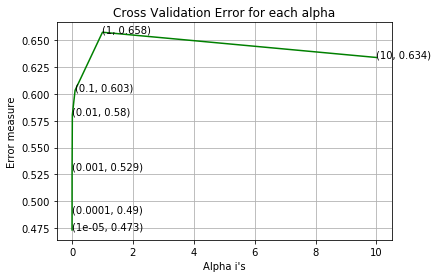

For values of best alpha =  1e-05 The train log loss is: 0.4336526622679598
For values of best alpha =  1e-05 The test log loss is: 0.47320064888359764
Total number of data points : 133416


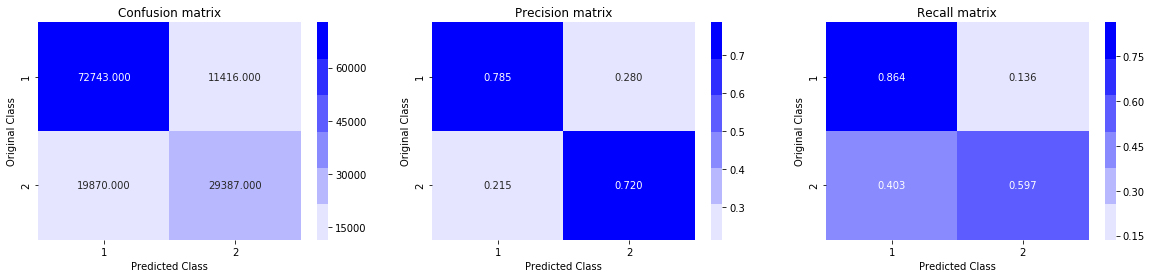

In [31]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array_tfidf = []
for i in alpha:
    clf_tdidf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42)
    clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
    sig_clf_tdidf = CalibratedClassifierCV(clf_tdidf, method="sigmoid")
    sig_clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
    predict_y = sig_clf_tdidf.predict_proba(FinalQuora_te_tfidf)
    log_error_array_tfidf.append(log_loss(isDuplicate_test, predict_y, labels=clf_tdidf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(isDuplicate_test, predict_y, labels=clf_tdidf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array_tfidf,c='g')
for i, txt in enumerate(np.round(log_error_array_tfidf,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array_tfidf[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array_tfidf)
clf_tdidf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42)
clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
sig_clf_tdidf = CalibratedClassifierCV(clf_tdidf, method="sigmoid")
sig_clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)

predict_y = sig_clf_tdidf.predict_proba(FinalQuora_tr_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(isDuplicate_train, predict_y, labels=clf_tdidf.classes_, eps=1e-15))
predict_y = sig_clf_tdidf.predict_proba(FinalQuora_te_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(isDuplicate_test, predict_y, labels=clf_tdidf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(isDuplicate_test, predicted_y)

For values of alpha =  1e-05 The log loss is: 0.4756270592491547
For values of alpha =  0.0001 The log loss is: 0.4883877732860549
For values of alpha =  0.001 The log loss is: 0.5206307887737196
For values of alpha =  0.01 The log loss is: 0.5392722575399467
For values of alpha =  0.1 The log loss is: 0.5506889259583466
For values of alpha =  1 The log loss is: 0.6501838275645053
For values of alpha =  10 The log loss is: 0.6286721557885355


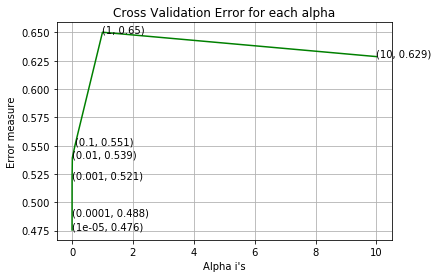

For values of best alpha =  1e-05 The train log loss is: 0.43782110317985934
For values of best alpha =  1e-05 The test log loss is: 0.4756270592491547
Total number of data points : 133416


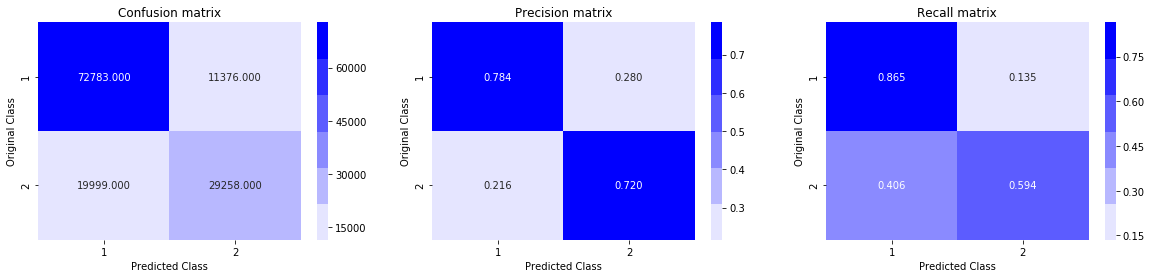

In [44]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

log_error_array_tfidf = []
for i in alpha:
    clf_tdidf = SGDClassifier(alpha=i, penalty='l2', loss='hinge', random_state=42)
    clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
    sig_clf_tdidf = CalibratedClassifierCV(clf_tdidf, method="sigmoid")
    sig_clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
    predict_y = sig_clf_tdidf.predict_proba(FinalQuora_te_tfidf)
    log_error_array_tfidf.append(log_loss(isDuplicate_test, predict_y, labels=clf_tdidf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(isDuplicate_test, predict_y, labels=clf_tdidf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array_tfidf,c='g')
for i, txt in enumerate(np.round(log_error_array_tfidf,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array_tfidf[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array_tfidf)
clf_tdidf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='hinge', random_state=42)
clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
sig_clf_tdidf = CalibratedClassifierCV(clf_tdidf, method="sigmoid")
sig_clf_tdidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)

predict_y = sig_clf_tdidf.predict_proba(FinalQuora_tr_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(isDuplicate_train, predict_y, normalize=True, eps=1e-15))
predict_y = sig_clf_tdidf.predict_proba(FinalQuora_te_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(isDuplicate_test, predict_y, normalize=True, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(isDuplicate_test, predicted_y)

## Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.

In [37]:
import xgboost as xgb
from scipy import stats
import random
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import log_loss

clf_xgb = xgb.XGBClassifier(objective = 'binary:logistic')

params = {}
params['n_estimators'] = stats.randint(50, 600)
params['max_depth'] = stats.randint(3, 10)

clf_xgb_tfidf = RandomizedSearchCV(clf_xgb, param_distributions = params, n_iter = 10, scoring = 'neg_log_loss')
clf_xgb_tfidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)

RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
          estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1),
          fit_params=None, iid='warn', n_iter=10, n_jobs=None,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E6D9C38198>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001E6D9C380F0>},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring='neg_log_loss', verbose=0)

In [48]:
clf_xgb_tfidf.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=8, min_child_weight=1, missing=None,
       n_estimators=459, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [41]:
clf_xgb_tfidf.cv_results_

{'mean_fit_time': array([389.24354426, 367.32498153, 301.50068601, 650.03729026,
        311.98088058, 140.62370165, 277.395015  , 169.24964905,
        383.9708813 , 423.66160583]),
 'std_fit_time': array([ 0.15705635,  1.08776727,  2.35244347, 13.29834526,  2.83479395,
         2.50480307,  7.00384762,  0.26943906,  0.58090486,  0.72279985]),
 'mean_score_time': array([1.54917773, 1.57702764, 1.27605255, 2.64232437, 1.4765652 ,
        0.9226052 , 1.17570114, 0.87939167, 1.78640763, 1.76931564]),
 'std_score_time': array([0.06295424, 0.01342454, 0.03733585, 0.06109798, 0.04020179,
        0.03305707, 0.01817125, 0.00538533, 0.01956651, 0.00482308]),
 'param_max_depth': masked_array(data=[4, 6, 3, 8, 6, 5, 4, 3, 9, 5],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[561, 335, 528, 459, 283, 156, 392, 330, 261, 516],
              

The train log loss is: 0.39881467600510984
The test log loss is: 0.45265138084898415
Total number of data points : 133416


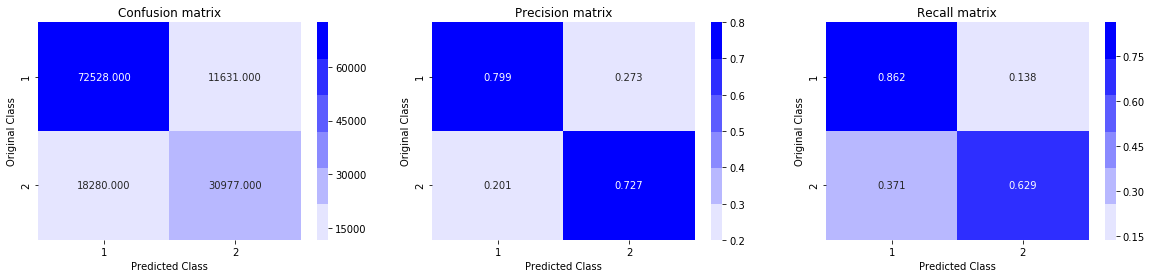

Wall time: 2h 2min 33s


In [52]:
%%time
# Best Estimators : max_depth=8, n_estimators=459,

log_loss_xgbModel = []

xgbModel = xgb.XGBClassifier(objective = 'binary:logistic',max_depth=8, min_child_weight=1, missing=None, n_estimators=459)
sig_clf_xgb_tfidf = CalibratedClassifierCV(xgbModel, method="sigmoid")
sig_clf_xgb_tfidf.fit(FinalQuora_tr_tfidf, isDuplicate_train)
predict_y = sig_clf_xgb_tfidf.predict_proba(FinalQuora_tr_tfidf)
print("The train log loss is:",log_loss(isDuplicate_train, predict_y, normalize=True, eps=1e-15))
predict_y = sig_clf_xgb_tfidf.predict_proba(FinalQuora_te_tfidf)
print("The test log loss is:",log_loss(isDuplicate_test, predict_y, normalize=True, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(isDuplicate_test, predicted_y)

In [53]:
# Try out models (Logistic regression, Linear-SVM) with simple TF-IDF vectors instead of TD_IDF weighted word2Vec.
# Hyperparameter tune XgBoost using RandomSearch to reduce the log-loss.


from prettytable import PrettyTable
    
x = PrettyTable()
x.field_names = ["Model", "Vectorizer", "Alpha", "Tree Depth","Estimators", "Total Samples", "Train Log Loss", "Test Log Loss"]


x.add_row(["Random Model", "Random",'NaN', 'NaN', 'NaN', 30000, 'NaN', 0.893])
x.add_row(["Logistic Regression", "Random",1, 'NaN', 'NaN', 30000, 0.505, 0.510])
x.add_row(["Linear Regression", "Random",1, 'NaN', 'NaN', 30000, 0.482, 0.490])
x.add_row(["Logistic Regression", "TFIDF Vectors",'1e-05', 'NaN', 'NaN', 133416, 0.433, 0.473])
x.add_row(["Linear SVM", "TFIDF Vectors", '1e-05', 'NaN', 'NaN', 133416, 0.437, 0.475])
x.add_row(["XGBoost", "TFIDF Vectors", 'NaN', 8, 459, 133416, 0.398, 0.452 ])

print(x)

+---------------------+---------------+-------+------------+------------+---------------+----------------+---------------+
|        Model        |   Vectorizer  | Alpha | Tree Depth | Estimators | Total Samples | Train Log Loss | Test Log Loss |
+---------------------+---------------+-------+------------+------------+---------------+----------------+---------------+
|     Random Model    |     Random    |  NaN  |    NaN     |    NaN     |     30000     |      NaN       |     0.893     |
| Logistic Regression |     Random    |   1   |    NaN     |    NaN     |     30000     |     0.505      |      0.51     |
|  Linear Regression  |     Random    |   1   |    NaN     |    NaN     |     30000     |     0.482      |      0.49     |
| Logistic Regression | TFIDF Vectors | 1e-05 |    NaN     |    NaN     |     133416    |     0.433      |     0.473     |
|      Linear SVM     | TFIDF Vectors | 1e-05 |    NaN     |    NaN     |     133416    |     0.437      |     0.475     |
|       XGBoost 